<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum


In [145]:
from google.colab import drive

# Acceessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


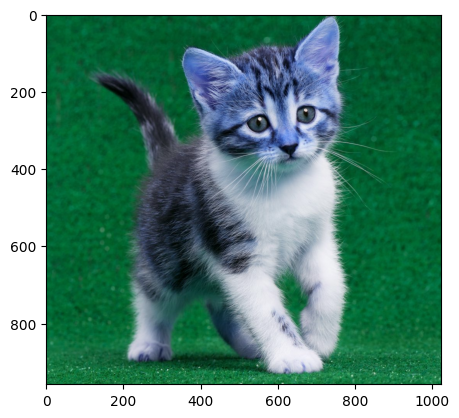

In [146]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
plt.imshow(img)

2. OpenCV membaca image dan menyimpan dalam channel warna BGR (Blue Green Red)
Tampilkan nilai pixel dan image

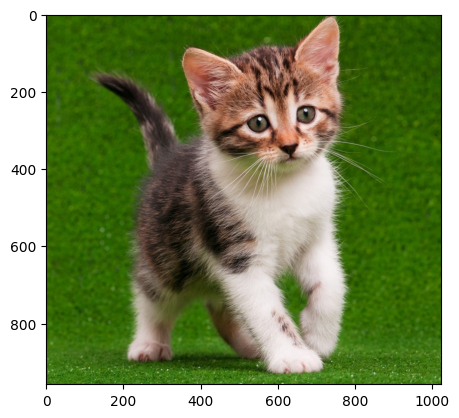

In [147]:
img2 = img
# Konversi warna
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img3)

3. Menampilkan citra Grayscale, melakukan resizing, melakuka Flipping, Menyimpan citra hasil

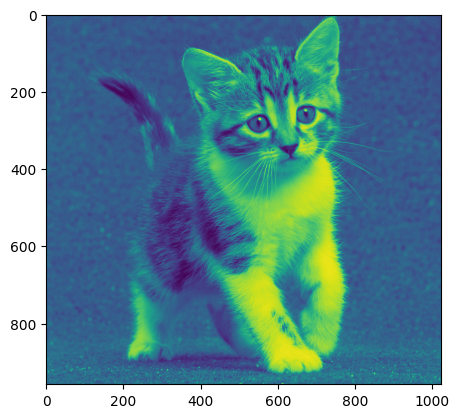

In [148]:
img_gray = cv.imread('/content/drive/MyDrive/images/kitten.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna 'gray'

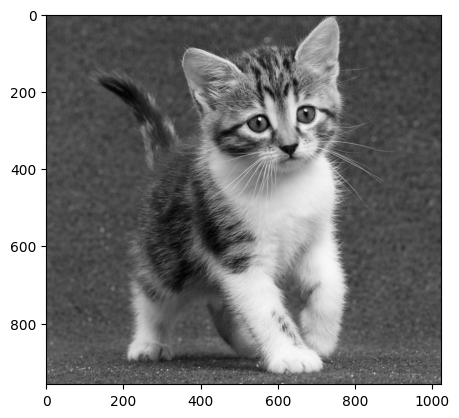

In [149]:
plt.imshow(img_gray, cmap = 'gray')

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna 'magma'

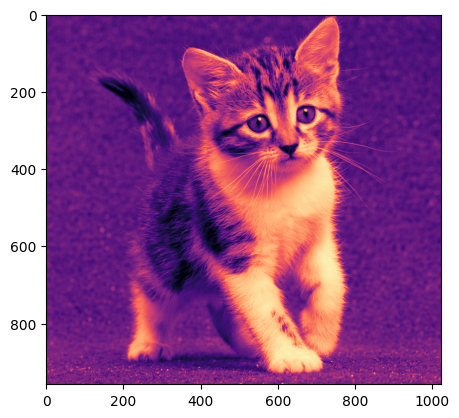

In [150]:
plt.imshow(img_gray, cmap = 'magma')

Citra RGB di resize dalam ukuran panjang 512 dan lebar 1024

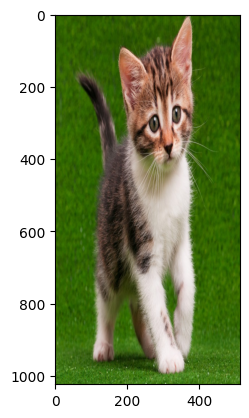

In [151]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

Citra RGB ditampilkan dalam ukuran yang lebih besar dengan posisi gambar terbalik

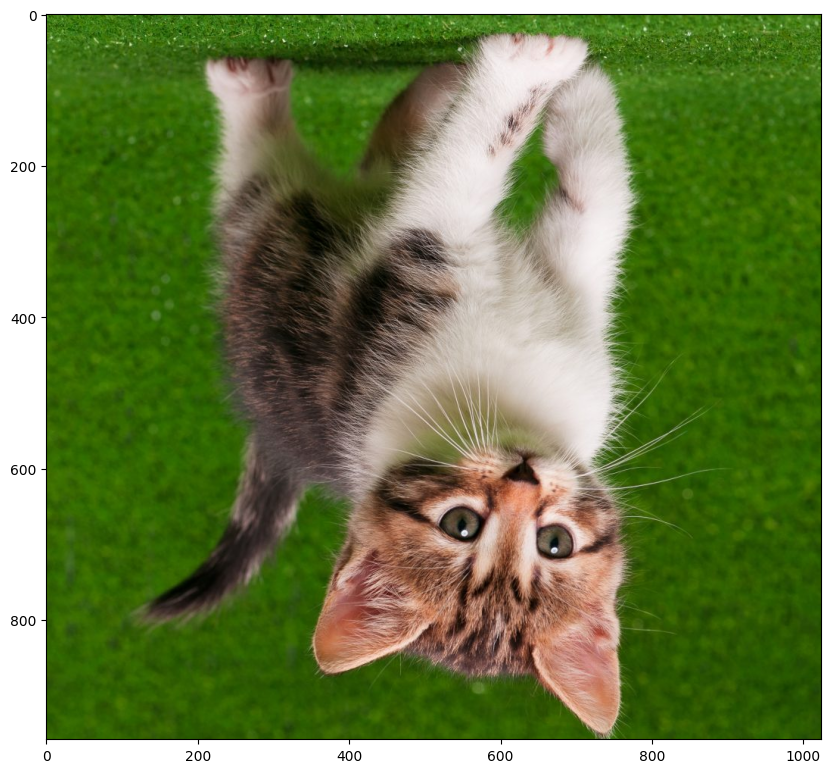

In [152]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB), 0)

# simpan file image
# cv.imwrite('/content/drive/MyDrive/images/kitten.jpg', img5)

# tampilkan plot dengan ukuran canvas yang lebih besar
fig = plt.figure(figsize=(10,10)) # ubah ukuran sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

4. Membuat bentuk Geometri 2D dari OpenCV. Diawali dengan pembuatan black image
dengan tipe data int16.

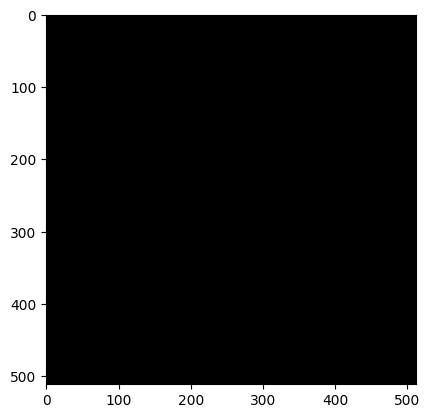

In [153]:
black_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(black_img)

Kemudian menambahkan bentuk persegi panjang sesuai koordinat pt1 dan pt2

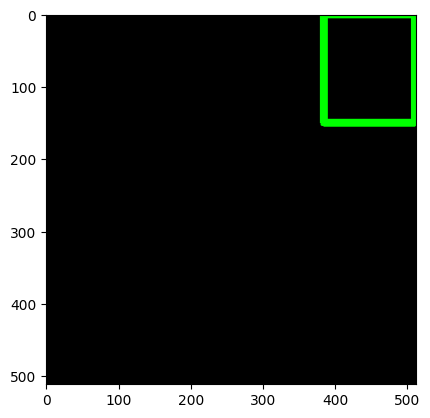

In [154]:
# perhatikan koordinat titik2 pt1 dan pt2
cv.rectangle(black_img,pt1=(384,0),pt2=(510,150),color=(0,255,0),thickness=10)
plt.imshow(black_img)

Selanjutnya ditambah menambahkan bentuk persegi sesuai koordinat pt1 dan pt2
yang tertulis pada kode program

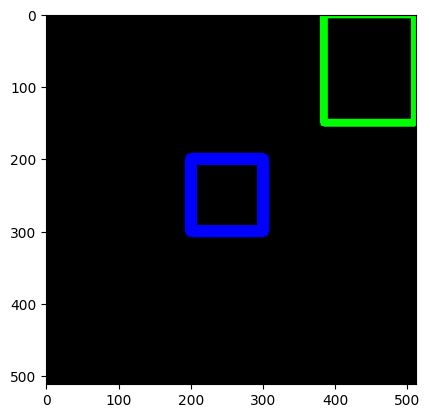

In [155]:
cv.rectangle(black_img,pt1=(200,200),pt2=(300,300),color=(0,0,255),thickness=15)
plt.imshow(black_img)

Tahap selanjutnya ditambah menambahkan bentuk lingkaran sesuai radius yang tertulis pada kode program

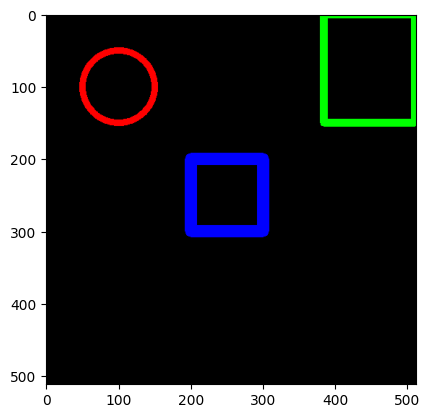

In [156]:
cv.circle(black_img,center=(100,100),radius=50,color=(255,0,0),thickness=8)
plt.imshow(black_img)

Kemudian dilakukan penambahan garis sesuai koordinat pt1 dan pt2 sebagai berikut

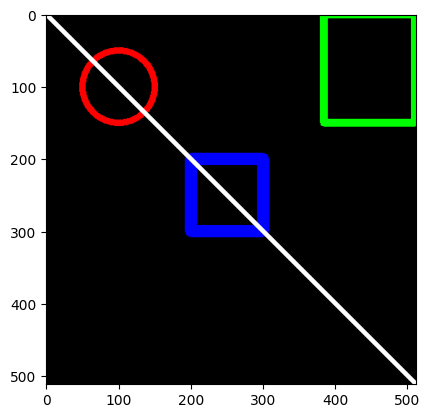

In [157]:
cv.line(black_img,pt1=(0,0),pt2=(512,512),color=(255,255,255),thickness=5)
plt.imshow(black_img)

Penambahan text dengan font yang telah tertulis dengan ukuran yang sudah ditentukan

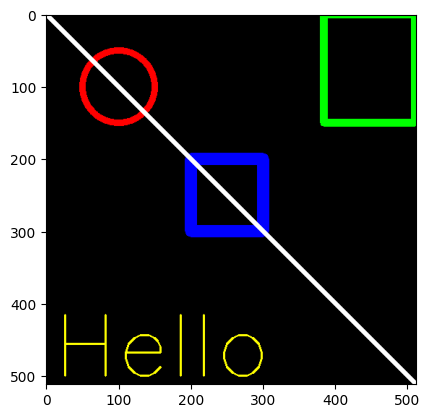

In [158]:
font = cv.FONT_ITALIC
cv.putText(black_img,text='Hello',org=(10,500),fontFace=font,fontScale=4,color=(255,255,0),thickness=2,lineType=cv.LINE_AA)
plt.imshow(black_img)

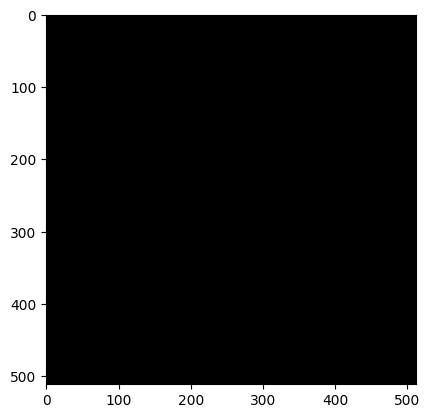

In [159]:
black_img2 = np.zeros(shape=(512,512,3),dtype=np.int32)
plt.imshow(black_img2)

Pembuatan black image kembali dilakukan dengan tipe data int32

Berikut adalah kode program untuk inisialisasi NumPy array dengan tipe data int32

In [160]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

Array tersebut kemudian di reshape sebagai berikut

In [161]:
pts = vertices.reshape((-1,1,2)) # nilai 2 untuk menunjukkan bahwa tiap titik dibuat 3 channel yang mewakili R, G, B
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

Penambahan polyline pada black image kedua yang telah dibuat

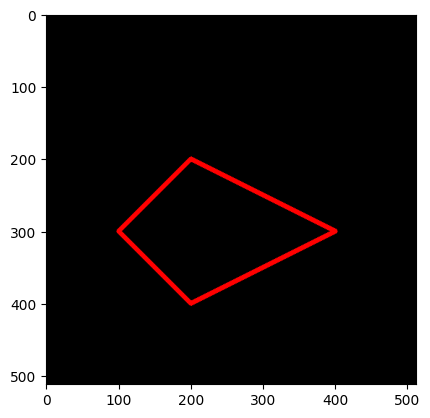

In [162]:
cv.polylines(black_img2,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(black_img2)

# Pertanyaan

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?
2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16 dan int32
3. Apakah kegunaan "google.colab.patches import cv2.imshow" pada potongan kode berikut
4. Apakah kegunaan "skimage import io" pada potongan soal nomor 3

Jawaban : \
1. Jika gambar ditampilkan tanpa Matplotlib, misalnya menggunakan OpenCV (cv2.imshow()), axis x dan y tidak akan terlihat. Hal ini dapat menyulitkan ketika melakukan manipulasi gambar, karena tidak ada referensi posisi pixel yang jelas. Matplotlib (plt.imshow()) secara otomatis menampilkan axis, yang mempermudah untuk memahami koordinat setiap pixel, terutama saat melakukan operasi seperti cropping, masking, atau mengedit bagian spesifik dari gambar. Dengan axis yang ditampilkan, manipulasi gambar dapat dilakukan lebih akurat, karena setiap titik pada gambar memiliki referensi koordinat yang jelas. \

2. * int16 (bilangan bulat 16-bit) mempunyai rentang nilai dari -32,768 hingga 32,767.
  * int32 (bilangan bulat 32-bit) mempunyai rentang nilai yang jauh lebih besar, yaitu dari -2,147,483,648 hingga 2,147,483,647.
  * int16 menyimpan nilai lebih kecil dibanding int32. Tidak ada perbedaan visual untuk gambar hitam, tetapi int32 menggunakan lebih banyak memori. \

3. Kegunaannya untuk memvisualisasikan gambar saat menggunakan OpenCV
4. Fungsi ini memungkinkan untuk membaca gambar dari berbagai format file dan menampilkannya dengan mudah. Berbeda dengan cv2.imread() yang digunakan oleh OpenCV, skimage.io.imread() secara default membaca gambar dalam format RGB.

# Tugas

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga berubah? \

* Menggunakan figsize dalam Matplotlib hanya mengubah ukuran tampilan gambar pada plot, tetapi tidak mengubah ukuran gambar dalam satuan pixel. Gambar tetap memiliki resolusi pixel yang sama, namun tampilannya bisa diperbesar atau diperkecil tergantung dari nilai figsize yang diberikan.

2. Tampilan image dalam channel Red-Blue dan Green-Blue saja!



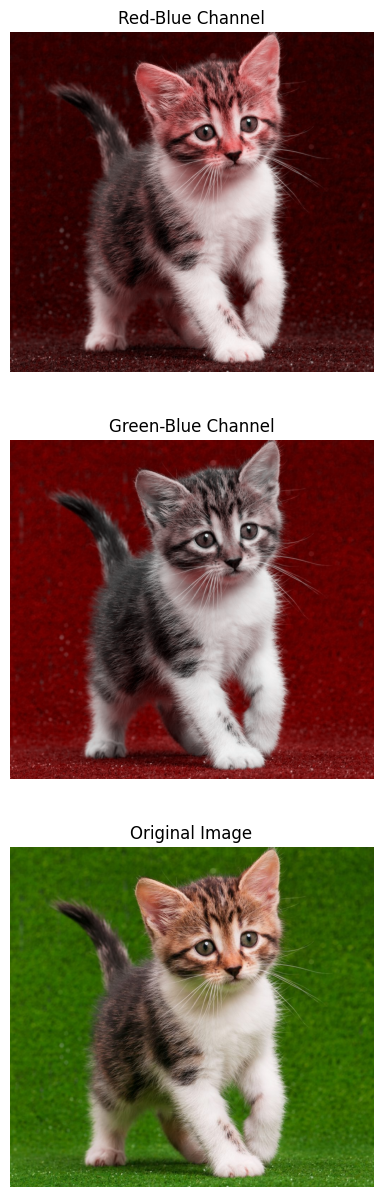

In [163]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_channel = img_rgb[:,:,0]
green_channel = img_rgb[:,:,1]
blue_channel = img_rgb[:,:,2]

red_blue_channel = cv.merge([red_channel, blue_channel, blue_channel])
green_blue_channel = cv.merge([green_channel, blue_channel, blue_channel])

plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
plt.imshow(red_blue_channel)
plt.title('Red-Blue Channel')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(green_blue_channel)
plt.title('Green-Blue Channel')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120

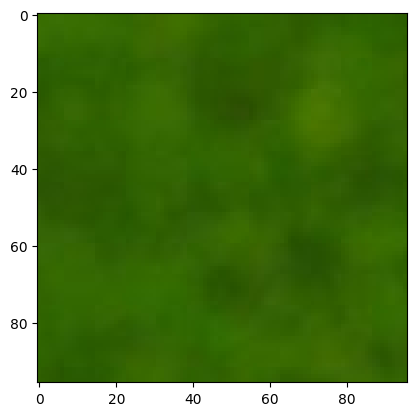

In [164]:
cropped_img = img_rgb[20:116, 25:121]
plt.imshow(cropped_img)

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

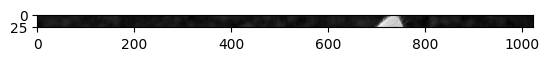

In [165]:
cropped_img = img_rgb[5:31, :, 0]
plt.imshow(cropped_img, cmap='gray')

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. Disarankan menggunakan bilangan acak/random!

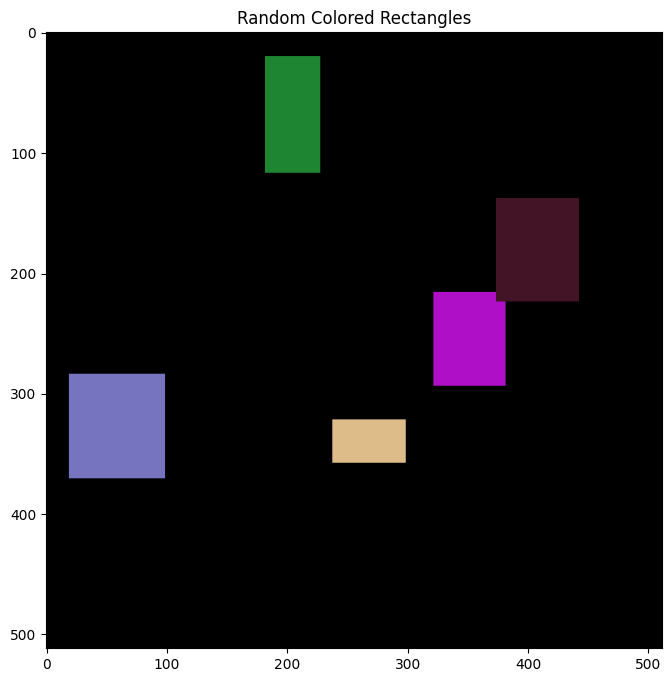

In [166]:
# Buat gambar kosong (kanvas) berukuran 512x512 dengan 3 channel (RGB)
height, width = 512, 512
image = np.zeros((height, width, 3), dtype=np.uint8)

# Fungsi untuk menghasilkan warna acak
def random_color():
    return np.random.randint(0, 256, size=3).tolist()

# Fungsi untuk menghasilkan posisi dan ukuran acak
def random_rect_params():
    x = np.random.randint(0, width - 50)
    y = np.random.randint(0, height - 50)
    w = np.random.randint(30, 100)
    h = np.random.randint(30, 100)
    return x, y, w, h

# Gambarkan 5 kotak dengan warna dan ukuran acak
for _ in range(5):
    x, y, w, h = random_rect_params()
    color = random_color()
    cv.rectangle(image, (x, y), (x + w, y + h), color, -1)

# Tampilkan gambar
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title('Random Colored Rectangles')
plt.axis('on')
plt.show()

6. Tampilkan image dengan posisi terbalik!

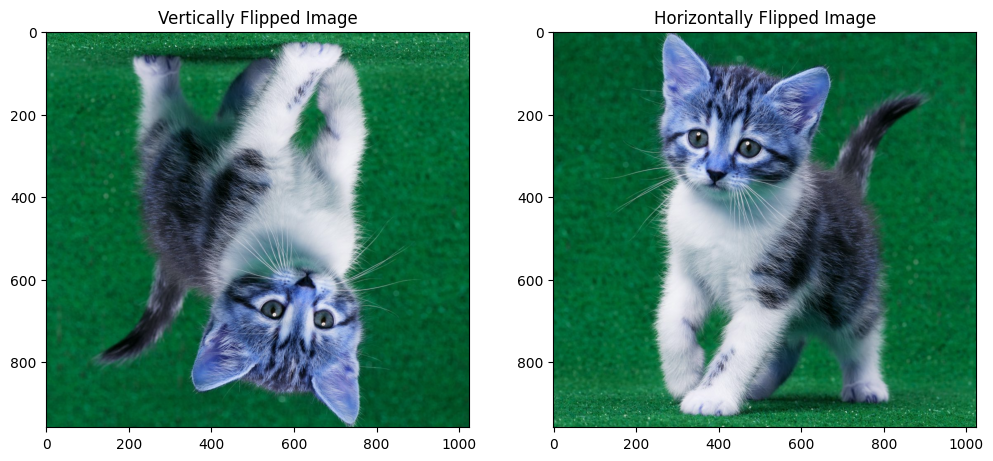

In [167]:
flipped_vertical = cv.flip(img, 0)
flipped_horizontal = cv.flip(img, 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(flipped_vertical)
plt.title('Vertically Flipped Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(flipped_horizontal)
plt.title('Horizontally Flipped Image')
plt.axis('on')

plt.show()

Berdasarkan praktikum bagian 3 dan 4 kerjakan beberapa tugas berikut : \
7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat beraktifitas (bukan pasfoto).

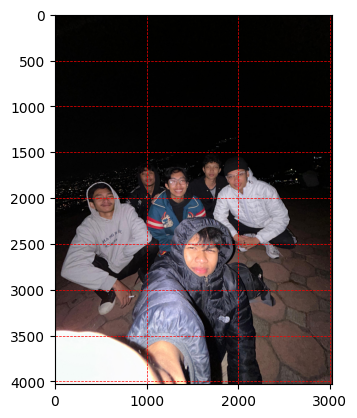

In [168]:
img2 = cv.imread('/content/drive/MyDrive/images/Friends.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.grid(True, which='both', color='r', linestyle='--', linewidth=0.5)
plt.imshow(img2)

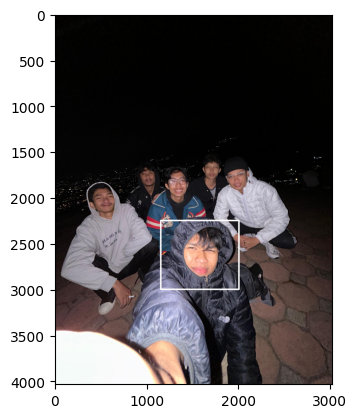

In [169]:
cv.rectangle(img2, pt1=(1150,2250), pt2=(2000,3000), color=(255,255,255), thickness=15)
plt.imshow(img2)

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!

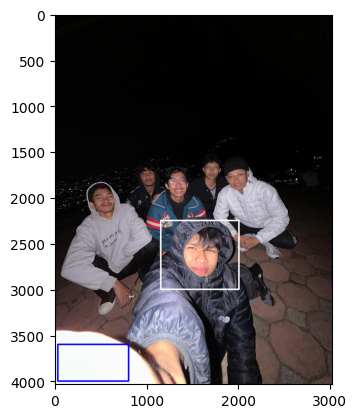

In [170]:
cv.rectangle(img2, pt1=(30, 4000), pt2=(800,3600), color=(0,0,255), thickness=15)
plt.imshow(img2)

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran
font, dan warna font yang sesuai keinginan anda.

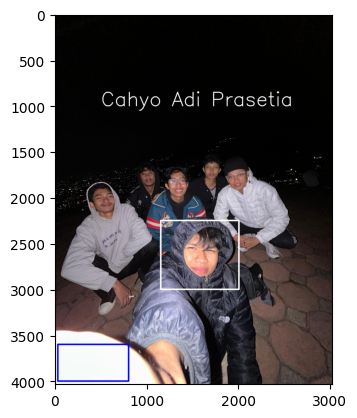

In [171]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img2, text='Cahyo Adi Prasetia', org=(500,1000),
fontFace=font, fontScale=7, color=(255,255,255), thickness=10,
lineType=cv.LINE_AA)
plt.imshow(img2)

# Tugas Kelompok

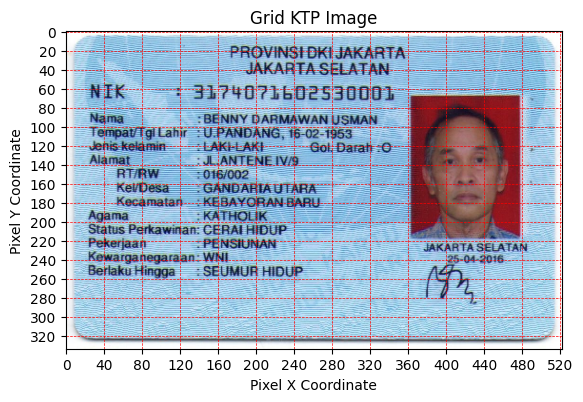

In [172]:
ktp_link = "https://1.bp.blogspot.com/-O7moTbXrgA8/WCqwfDFSNfI/AAAAAAAAAIA/vMyIFtkG8ok_ATFOzyaOiYeRDXtPVKfzQCLcB/s1600/KTP_seumur_hidup_25042016__1_.jpg'"
ktp_img = io.imread(ktp_link)
# resize to half dimension
ktp_img = cv.resize(ktp_img, (0,0), fx=0.5, fy=0.5)
# pick image to show
plt.imshow(ktp_img)
# adding title and label
plt.title('Grid KTP Image')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
# create grid to true in both X and Y coordinate, paint red for grid,
# create style with '--' and width line to 0.5
plt.grid(True, which='both', color='r', linestyle='--', linewidth=0.5)
# Set grid spacing for X and Y distance pixel coordinate to 40 and 20
# respectively
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.show()

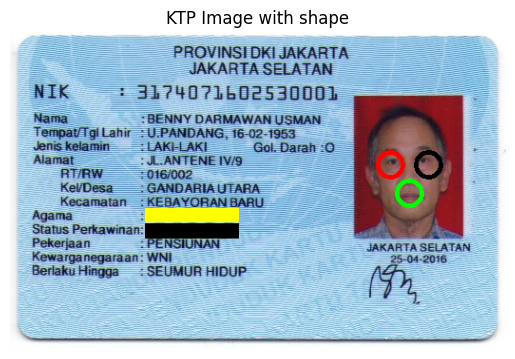

In [174]:
# cover religion and marital status
cv.rectangle(ktp_img, pt1=(142, 186), pt2=(240, 200),
color=(255,255,0), thickness=-1)
cv.rectangle(ktp_img, pt1=(142, 202), pt2=(240, 217), color=(0,0,0),
thickness=-1)
# create 3 circle
cv.circle(ktp_img, center=(400, 140), radius=13, color=(255, 0, 0),
thickness=3)
cv.circle(ktp_img, center=(440, 140), radius=13, color=(0, 0, 0),
thickness=3)
cv.circle(ktp_img, center=(420, 170), radius=13, color=(0, 255, 0),
thickness=3)
plt.title('KTP Image with shape')
plt.axis('off')
plt.imshow(ktp_img)